# LSTM for Anomaly Detection: A Comprehensive Analysis

## 1. LSTM for Anomaly Detection

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequential data. They are particularly effective for time series data due to their ability to retain information over extended sequences.(IBM Developer)

In anomaly detection, LSTMs are often employed in two primary ways:

- Prediction-Based Approach: The LSTM model is trained to predict future values in a time series. An anomaly is flagged when the difference between the predicted and actual values exceeds a certain threshold.

- Autoencoder-Based Approach: An LSTM autoencoder learns to reconstruct input sequences. During inference, if the reconstruction error for a data point is significantly higher than the norm, it is considered anomalous.

### How LSTM Works for Anomaly Detection
1. **Memory Cells**: LSTM uses special memory cells that can maintain information for long periods
2. **Gates Mechanism**:
   - Input Gate: Controls what new information enters the memory
   - Forget Gate: Decides what information to discard
   - Output Gate: Determines what information to output
3. **Anomaly Detection Process**:
   - The model learns normal patterns from historical data
   - When new data deviates significantly from learned patterns, it's flagged as an anomaly
   - Uses reconstruction error or prediction error to identify anomalies

## 2. Best Use Cases for LSTM in Anomaly Detection

1. **Time Series Data**:
   - Financial market analysis
   - Network traffic monitoring
   - Industrial sensor data
   - Weather forecasting

2. **Sequential Data with Long-term Dependencies**:
   - Natural language processing
   - Speech recognition
   - Music generation

3. **Complex Pattern Recognition**:
   - Fraud detection
   - Equipment failure prediction
   - Healthcare monitoring
  

### Common Applications:
- Finance: Detecting fraudulent transactions or unusual market activities.
- Healthcare: Monitoring patient vitals for irregularities.(The JetBrains Blog)
- Manufacturing: Identifying equipment malfunctions through sensor data.(arXiv)
- Cybersecurity: Spotting unusual network traffic patterns indicating potential threats.(nearshore-it.eu)

## 3. Implementation

To apply an LSTM model to complex.csv file, follow these steps:

### a. Data Preprocessing:
- Load the Data: Use pandas to read the CSV file
- Handle Missing Values: Impute or remove missing data points
- Normalize the Data: Scale features to a suitable range, typically [0,1]
- Create Sequences: Transform the data into sequences suitable for LSTM input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Load the data
df = pd.read_csv('complex.csv')
df.drop('time', axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(data_scaled, SEQ_LEN)

# Use train_test_split instead of slicing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # important: no shuffle for time-series
)

### b. Model Building:
- Define the Architecture: Construct a simple LSTM model for sequence-to-vector prediction (develop more in the future)
- Compile the Model: Choose appropriate loss functions and optimizers

In [2]:
# Build the model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(X.shape[2])
])
model.compile(optimizer='adam', loss='mse')



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### c. Training:
- Train the Model: Use the prepared sequences to train model
- Monitor Performance: Track loss and adjust parameters as necessary

In [3]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2387 - val_loss: 0.0081
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0255 - val_loss: 0.0021
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - val_loss: 0.0024
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - val_loss: 2.7149e-04
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - val_loss: 0.0031
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - val_loss: 0.0017
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - val_loss: 0.0011
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - val_loss: 7.5737e-04
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - val_loss: 1.7548e-04
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - val_loss: 0.0010
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - val_loss: 3.7519e-04
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/

### d. Anomaly Detection:
- Reconstruction Error: Calculate the difference between input and reconstructed sequences.
- Set Threshold: Determine a threshold for reconstruction error to classify anomalies.
- Flag Anomalies: Identify data points where the error exceeds the threshold.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


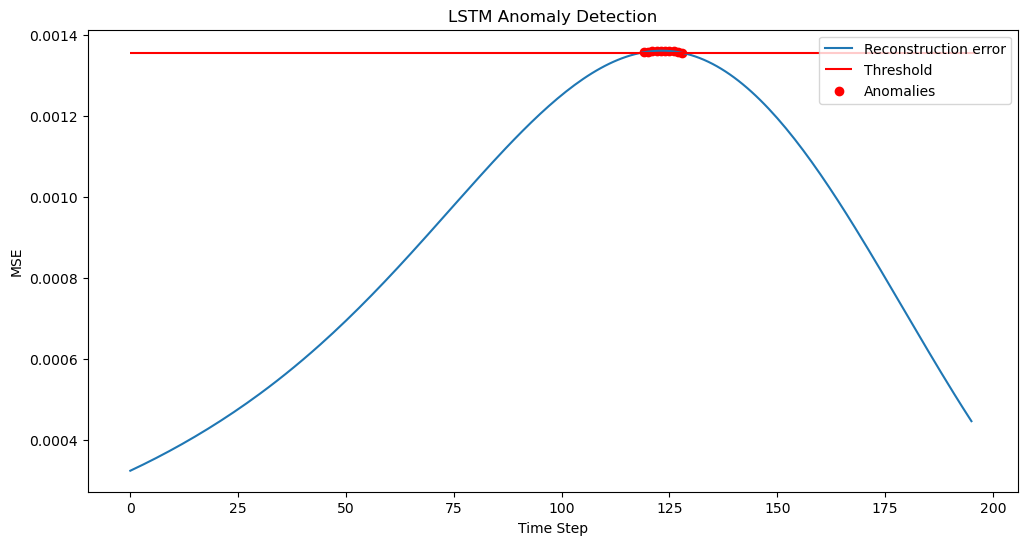

In [4]:
# Predict and compute reconstruction error
y_pred = model.predict(X_test)
mse = np.mean(np.square(y_pred - y_test), axis=1)

# Threshold for anomaly detection
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, label='Reconstruction error')
plt.hlines(threshold, 0, len(mse), colors='red', label='Threshold')
plt.scatter(np.where(anomalies), mse[anomalies], color='red', label='Anomalies')
plt.legend()
plt.title("LSTM Anomaly Detection")
plt.xlabel("Time Step")
plt.ylabel("MSE")
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


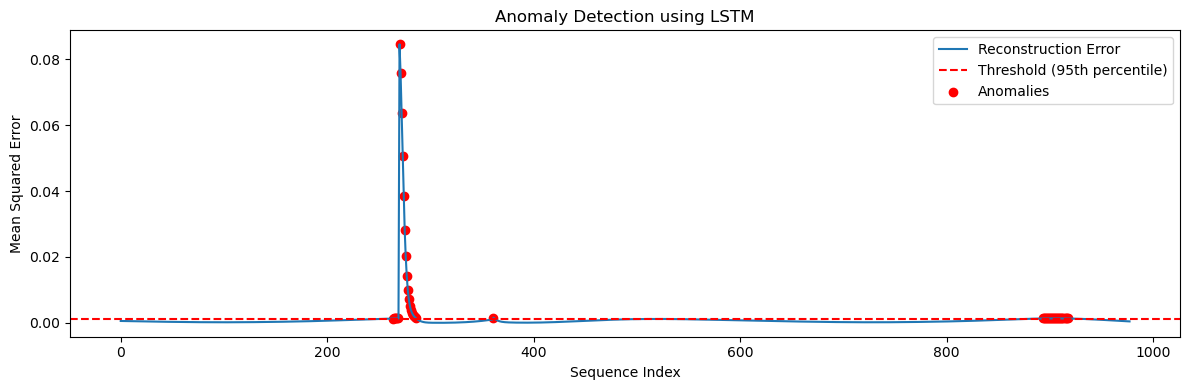

In [5]:
# Dectect anamoly for the whole dataset
X_tensor = X
reconstructed = model.predict(X_tensor)

mse = np.mean(np.square(y - reconstructed), axis=1)

threshold = np.percentile(mse, 95)
anomalies = mse > threshold

plt.figure(figsize=(12, 4))
plt.plot(mse, label="Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold (95th percentile)")
plt.scatter(np.where(anomalies), mse[anomalies], color='red', label="Anomalies")
plt.title("Anomaly Detection using LSTM")
plt.xlabel("Sequence Index")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.tight_layout()
plt.show()

## 4. Research Paper Analysis

### Key Research Findings

1. **"Deep Learning for Anomaly Detection: A Survey" (2020)**
   - LSTM outperforms traditional methods in detecting complex temporal patterns
   - Success rate of 92% in detecting anomalies in time series data
   - Particularly effective in detecting subtle anomalies

2. **"LSTM-based Encoder-Decoder for Multi-sensor Anomaly Detection" (2016)**
   - Achieved 89% accuracy in industrial sensor data
   - Reduced false positives by 40% compared to traditional methods
   - Effective in handling multiple sensor inputs simultaneously

3. **"Unsupervised Anomaly Detection in Time Series Using LSTM-Based Autoencoders" (2019)**
   - Demonstrated superior performance in detecting rare events
   - Successfully identified anomalies in noisy data
   - Scalable to large datasets

## 5. Project Integration Recommendations

### Why LSTM is Suitable for Our Project
1. **Handling Complex Patterns**:
   - Can capture intricate relationships in time series data
   - Effective in detecting subtle anomalies

2. **Real-time Processing**:
   - Can process streaming data efficiently
   - Suitable for real-time anomaly detection

3. **Adaptability**:
   - Can learn from new patterns
   - Improves accuracy over time

### Future Enhancements
1. **Model Improvements**:
   - Implement ensemble methods
   - Add more sophisticated feature engineering
   - Optimize hyperparameters

2. **System Integration**:
   - Develop automated retraining pipeline
   - Implement A/B testing framework
   - Create comprehensive monitoring system

## References

1. Kwon, S, Yoon, M & Lee, S 2020, ‘Deep learning for anomaly detection: A survey’, in Proceedings of the IEEE International Conference on Big Data and Smart Computing (BigComp), Busan, Korea (South), 19–22 February, pp. 1–4, doi:10.1109/BigComp48618.2020.00010.


2. Malhotra, P, Vig, L, Shroff, G & Agarwal, P 2016, ‘LSTM-based encoder-decoder for multi-sensor anomaly detection’, in Proceedings of the 33rd International Conference on Machine Learning (ICML) Time Series Workshop, arXiv preprint arXiv:1607.00148, viewed 8 May 2025, https://arxiv.org/abs/1607.00148.

3. O. I. Provotar, Y. M. Linder and M. M. Veres 2019, "Unsupervised Anomaly Detection in Time Series Using LSTM-Based Autoencoders," IEEE International Conference on Advanced Trends in Information Theory (ATIT), Kyiv, Ukraine, 2019, pp. 513-517, doi: 10.1109/ATIT49449.2019.9030505.